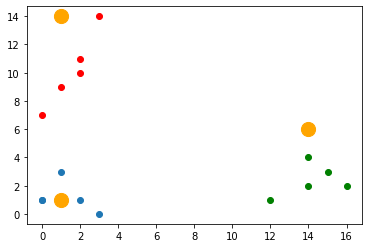

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


inp = pd.read_csv("input_data.csv", sep = ";")

one = inp.iloc[:,[0, 1]]
one = one.to_numpy()

two = inp.iloc[:,[2, 3]]
two = two.to_numpy()

three = inp.iloc[:,[4, 5]]
three = three.to_numpy()

M_points = np.array([[14, 6], [1, 1], [1, 14]])

plt.figure()

plt.scatter(one[:,0], one[:,1])
plt.scatter(two[:,0], two[:,1], color = "red")
plt.scatter(three[:,0], three[:,1], color = "green")
plt.scatter(M_points[:,0], M_points[:,1], color = 'orange', s = 200)

plt.show()

In [29]:
cov_1 = np.cov(one, bias = True, rowvar = False)
print(cov_1)

cov_2 = np.cov(two, bias = True, rowvar = False)
print(cov_2)

cov_3 = np.cov(three, bias = True, rowvar = False)
print(cov_3)

[[ 1.36 -0.44]
 [-0.44  0.96]]
[[1.04 2.28]
 [2.28 5.36]]
[[1.76 0.52]
 [0.52 1.04]]


In [30]:
united_cov = (cov_1*5 + cov_2*5 + cov_3*5)/13
print(united_cov)

inv_u_cov = np.linalg.inv(united_cov)
print(inv_u_cov)

[[1.6        0.90769231]
 [0.90769231 2.83076923]]
[[ 0.76397317 -0.24496966]
 [-0.24496966  0.43181092]]


In [31]:
mean_1 = one.mean(axis = 0)
print(mean_1)

mean_2 = two.mean(axis = 0)
print(mean_2)

mean_3 = three.mean(axis = 0)
print(mean_3)

[1.2 1.2]
[ 1.6 10.2]
[14.2  2.4]


In [17]:
b1 = np.dot(inv_u_cov, mean_1)
print(b1)

b2 =  np.dot(inv_u_cov, mean_2)
print(b2)

b3 =  np.dot(inv_u_cov, mean_3)
print(b3)

[0.62280422 0.22420952]
[-1.27633344  4.01251996]
[10.26049186 -2.44222293]


In [21]:
b1_0 = np.dot(b1, mean_1) * (-0.5)
print(b1_0)

b2_0 = np.dot(b2, mean_2) * (-0.5)
print(b2_0)

b3_0 = np.dot(b3, mean_3) * (-0.5)
print(b3_0)

-0.5082082401788566
-19.442785052698817
-69.91882465665918


In [26]:
d1 = np.dot(b1, M0)+b1_0
print(d1)

d2 = np.dot(b2, M0)+b2_0
print(d2)

d3 = np.dot(b3, M0)+b3_0
print(d3)

9.556307888853402
-13.236333439795573
59.07472373043757


In [41]:
for i in range(M_points.shape[0]):
    print("point number " + str(i))
    d1 = np.dot(b1, M_points[i,:])+b1_0
    print(d1)
    d2 = np.dot(b2, M_points[i,:])+b2_0
    print(d2)
    d3 = np.dot(b3, M_points[i,:])+b3_0
    print(d3)

point number 0
9.556307888853402
-13.236333439795573
59.07472373043757
point number 1
0.33880549345257105
-16.70659853082082
-62.100555732992625
point number 2
3.2535292238901317
35.4561609709358
-93.84945384861061
